# 13.8 Applied

In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 3.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=92130e90b953fe17483a14f8317f6e3a54690a13bc78b46f8bf274f84150e081
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uni

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from scipy.stats import \
(ttest_1samp,
ttest_rel,
ttest_ind,
t as t_dbn)
from statsmodels.stats.multicomp import \
pairwise_tukeyhsd
from statsmodels.stats.multitest import \
multipletests as mult_test

## Question 7. This problem makes use of the Carseats dataset in the ISLP package.

### (a) For each quantitative variable in the dataset besides Sales, fit a linear model to predict Sales using that quantitative variable. Report the p-values associated with the coefficients for the variables. That is, for each model of the form $Y = β_0 + β_1X +ϵ $, report the p-value associated with the coefficient $β_1$. Here, Y represents Sales and X represents one of the other quantitative variables.

In [3]:
from sklearn.feature_selection import f_regression


In [4]:
Carseats = load_data('Carseats')
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
Carseats = Carseats.drop(columns = ['Urban', 'US'])
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
0,9.50,138,73,11,276,120,Bad,42,17
1,11.22,111,48,16,260,83,Good,65,10
2,10.06,113,35,10,269,80,Medium,59,12
3,7.40,117,100,4,466,97,Medium,55,14
4,4.15,141,64,3,340,128,Bad,38,13


In [32]:
y = Carseats['Sales']
X = Carseats.drop(columns = ['Sales', 'ShelveLoc'])
X.head(), y

(   CompPrice  Income  Advertising  Population  Price  Age  Education
 0        138      73           11         276    120   42         17
 1        111      48           16         260     83   65         10
 2        113      35           10         269     80   59         12
 3        117     100            4         466     97   55         14
 4        141      64            3         340    128   38         13,
 0       9.50
 1      11.22
 2      10.06
 3       7.40
 4       4.15
        ...  
 395    12.57
 396     6.14
 397     7.41
 398     5.94
 399     9.71
 Name: Sales, Length: 400, dtype: float64)

In [33]:
p_vals = []
for col in X.columns:
  f,p = f_regression(X[[col]], y)
  p_vals.append(p)
p_val_df = pd.DataFrame(p_vals, index = X.columns, columns = ['p_vals'])
p_val_df



,p_vals
CompPrice,2.009398e-01
Income,2.309670e-03
Advertising,4.377677e-08
Population,3.139816e-01
Price,7.618187e-21
Age,2.788950e-06
Education,2.999442e-01


### (b) Suppose we control the Type I error at level α = 0.05 for the p-values obtained in (a). Which null hypotheses do we reject?

In [34]:
p_goal = 0.05
for col in X.columns:
  if p_val_df.loc[col].item() <= p_goal:
    print(f' Reject Null Hypothesis for {col}')


 Reject Null Hypothesis for Income
 Reject Null Hypothesis for Advertising
 Reject Null Hypothesis for Price
 Reject Null Hypothesis for Age


### (c) Now suppose we control the FWER at level 0.05 for the p-values. Which null hypotheses do we reject?

- We will use Bonferroni for Family Wiser Error Rate.

- Thus $\text{FWER} = \frac {α}{m}$

- $ m = 7 $ since we have 7 columns we are hypotheses testing. $α = 0.05$

- $ \text{FWER}  = \frac{0.05}{7}$

- $0.00714$

In [37]:
p_goal = 0.00714
for col in X.columns:
  if p_val_df.loc[col].item() <= p_goal:
    print(f' Reject Null Hypothesis for {col}')

 Reject Null Hypothesis for Income
 Reject Null Hypothesis for Advertising
 Reject Null Hypothesis for Price
 Reject Null Hypothesis for Age


In [28]:
# We happen to accept the same null hypothesis

### (d) Finally, suppose we control the FDR at level 0.2 for the p-values. Which null hypotheses do we reject?

- We know FDR stands for False Discovery Rate

- We will use Benjamin - Hochberg


In [38]:
p_val_df = p_val_df.sort_values(by = 'p_vals')
p_val_df

,p_vals
Price,7.618187e-21
Advertising,4.377677e-08
Age,2.788950e-06
Income,2.309670e-03
CompPrice,2.009398e-01
Education,2.999442e-01
Population,3.139816e-01


In [39]:
m,q = 7 ,  0.2
threshold = []
for i in range(1,8):
  threshold.append((i * q)/m)
p_val_df['threshold'] = threshold
p_val_df



,p_vals,threshold
Price,7.618187e-21,0.028571
Advertising,4.377677e-08,0.057143
Age,2.788950e-06,0.085714
Income,2.309670e-03,0.114286
CompPrice,2.009398e-01,0.142857
Education,2.999442e-01,0.171429
Population,3.139816e-01,0.200000


In [40]:
reject = []
for i, p in enumerate(p_val_df['p_vals']):
  if p < p_val_df['threshold'].iloc[i]:
    reject.append(True)
  else: reject.append(False)
p_val_df['reject'] = reject
p_val_df

,p_vals,threshold,reject
Price,7.618187e-21,0.028571,True
Advertising,4.377677e-08,0.057143,True
Age,2.788950e-06,0.085714,True
Income,2.309670e-03,0.114286,True
CompPrice,2.009398e-01,0.142857,False
Education,2.999442e-01,0.171429,False
Population,3.139816e-01,0.200000,False


In [42]:
for col in X.columns:
  if p_val_df.loc[col]['reject'] == True:
    print(f'Reject Null Hypothesis for {col}')


Reject Null Hypothesis for Income
Reject Null Hypothesis for Advertising
Reject Null Hypothesis for Price
Reject Null Hypothesis for Age


In [43]:
# Happen to reject the same columns most likely since all the p values were spread out

## Question - 8. In this problem, we will simulate data from m = 100 fund managers.

In [7]:
rng = np.random.default_rng(1)
n, m = 20, 100
X = rng.normal(size=(n, m))

### These data represent each fund manager’s percentage returns for each of $n = 20$ months. We wish to test the null hypothesis that each fund manager’s percentage returns have population mean equal to zero. Notice that we simulated the data in such a way that each fund manager’s percentage returns do have population mean zero; in other words, all $m$ null hypotheses are true.

In [8]:
X.shape

(20, 100)

### (a) Conduct a one-sample t-test for each fund manager, and plot a histogram of the p-values obtained.

In [4]:
from scipy import stats

In [9]:
df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.345584,0.821618,0.330437,-1.303157,0.905356,0.446375,-0.536953,0.581118,0.364572,0.294132,...,0.876242,0.256486,-0.094828,-0.258848,1.055743,-2.250854,-0.138655,0.033000,-1.425349,0.332814
1,-0.651281,0.862445,-0.125592,0.669153,1.218844,0.382930,-0.875721,-1.514319,1.753384,-0.111292,...,-0.459072,1.226271,0.962155,-2.711285,0.041703,-1.617467,1.109638,0.168106,0.548405,-1.065125
2,1.828430,2.020073,-1.064771,0.372815,-0.673302,-0.023570,-1.265637,1.867146,-0.969180,-0.296084,...,-0.875422,1.001410,0.144085,0.782085,0.134622,0.262901,-0.782999,0.668047,1.784698,-0.309688
3,-0.592775,-0.157837,-0.481280,-0.701479,0.138194,-0.290918,1.438874,0.000202,0.323912,0.952022,...,0.681968,0.770631,-0.111646,-0.257662,-0.193803,-1.694992,0.188743,0.234578,-0.865529,0.742446
4,-1.372967,-0.551813,-0.475219,1.987510,-1.599184,0.562630,0.942123,0.377726,1.181808,-1.002738,...,-1.182603,0.162277,1.110292,0.271668,0.172856,-0.379214,0.561030,-2.135831,0.232373,0.028126
5,-1.370340,2.175598,-1.387413,-1.077520,-1.200863,1.110368,-0.888085,0.668656,0.587510,0.259670,...,-3.080178,-0.357138,-0.332090,-1.426456,-1.482503,-0.462462,-0.547100,1.259919,0.374863,-1.580855
6,-0.854651,0.705142,1.895977,0.386499,0.310713,1.860752,-0.022671,-0.309101,-1.413249,-0.513016,...,-1.066791,1.033177,0.465109,0.978769,-0.309761,0.563999,-0.730844,-1.371960,-1.694795,-0.551710
7,-0.548941,-0.629377,-3.548805,-1.998604,-0.532632,0.287017,-0.578793,-0.876897,-2.308473,2.021499,...,-1.219819,-0.265092,0.036187,1.368172,1.776935,-0.694593,-1.180284,-1.783845,1.288723,-0.135994
8,-0.697477,-0.101440,-2.608908,-1.776633,0.883802,0.344033,0.098079,-1.053687,0.535345,1.725905,...,0.345903,-0.592976,-0.352377,-0.504329,2.106537,0.191187,0.049320,-2.166612,0.723810,-1.071496
9,-1.142957,0.599558,-0.876409,0.822835,1.108893,-1.802395,-0.149110,-1.586818,-0.074934,0.899198,...,0.951823,0.577532,-0.354330,-0.213398,-0.359092,-0.338785,-2.418499,-0.076199,-0.397134,0.274956


In [11]:
t_stats = []
p_vals = []
for col in df.columns:
  t,p = stats.ttest_1samp(df[col], 0)
  t_stats.append(t)
  p_vals.append(p)
t_stats_df = pd.DataFrame(t_stats, columns = ['t_stats'])
t_stats_df['p_vals'] = p_vals
t_stats_df


,t_stats,p_vals
0,-2.055102,0.053880
1,1.319834,0.202573
2,-0.182948,0.856777
3,-0.504680,0.619587
4,0.743873,0.466054
...,...,...
95,-1.619326,0.121857
96,-1.009663,0.325343
97,-1.581710,0.130220
98,0.792289,0.437973


<Axes: xlabel='t_stats', ylabel='Count'>

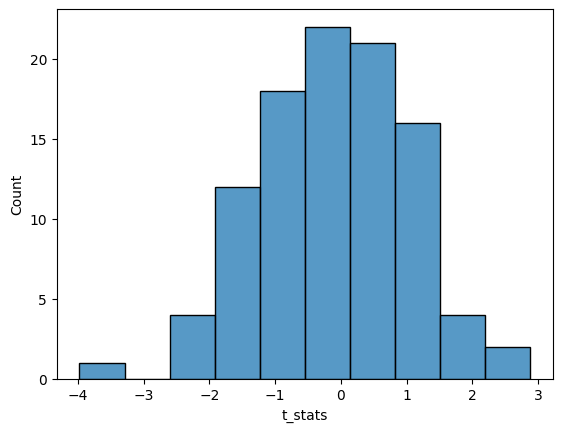

In [12]:
import seaborn as sns
sns.histplot(t_stats_df['t_stats'])

### (b) If we control Type I error for each null hypothesis at level α = 0.05, then how many null hypotheses do we reject?

In [13]:
for i,val in enumerate(t_stats_df['p_vals']):
  if val < 0.05: print(f'Reject the Null Hypothesis for manager {i+1}')

Reject the Null Hypothesis for manager 15
Reject the Null Hypothesis for manager 28
Reject the Null Hypothesis for manager 40
Reject the Null Hypothesis for manager 45


### (c) If we control the FWER at level 0.05, then how many null hypotheses do we reject?


#### FWER Equation using Bonferrari
 1. $\text{FWER} = \frac {α}{m}$
 1. $\alpha = 0.05, m = 100$
 1. $ \text{FWER} = \frac {0.05}{100} $
 1. $\text{FWER} = .0005 $

In [14]:
alpha_FWER = 0.0005
for i,val in enumerate(t_stats_df['p_vals']):
  if val < alpha_FWER: print(f'Reject the Null Hypothesis for manager {i+1}')

In [15]:
# We would reject 0 null hypotheses since the boundary is too strict with a large m

### (d) If we control the FDR at level 0.05, then how many null hypotheses do we reject?



In [16]:
t_stats_df = t_stats_df.sort_values(by = 'p_vals')
t_stats_df

,t_stats,p_vals
14,-3.977494,0.000807
44,2.881881,0.009551
39,-2.474619,0.022933
27,2.263014,0.035539
72,-2.090345,0.050266
...,...,...
32,-0.115618,0.909169
73,0.112263,0.911793
12,0.106703,0.916143
18,-0.105460,0.917116


In [17]:
threshold = []
m,q = 100, 0.05
for i in range(1, 101):
  threshold.append((q *i)/m)
t_stats_df['threshold'] = threshold
t_stats_df


,t_stats,p_vals,threshold
14,-3.977494,0.000807,0.0005
44,2.881881,0.009551,0.0010
39,-2.474619,0.022933,0.0015
27,2.263014,0.035539,0.0020
72,-2.090345,0.050266,0.0025
...,...,...,...
32,-0.115618,0.909169,0.0480
73,0.112263,0.911793,0.0485
12,0.106703,0.916143,0.0490
18,-0.105460,0.917116,0.0495


In [19]:
reject = []
for i,val in enumerate(t_stats_df['p_vals']):
  if val < t_stats_df['threshold'].iloc[i]: reject.append(True)
  else: reject.append(False)
t_stats_df['reject'] = reject
t_stats_df

,t_stats,p_vals,threshold,reject
14,-3.977494,0.000807,0.0005,False
44,2.881881,0.009551,0.0010,False
39,-2.474619,0.022933,0.0015,False
27,2.263014,0.035539,0.0020,False
72,-2.090345,0.050266,0.0025,False
...,...,...,...,...
32,-0.115618,0.909169,0.0480,False
73,0.112263,0.911793,0.0485,False
12,0.106703,0.916143,0.0490,False
18,-0.105460,0.917116,0.0495,False


In [20]:
# We don't reject any null hypotheses

### (e) Now suppose we “cherry-pick” the 10 fund managers who perform the best in our data. If we control the FWER for just these 10 fund managers at level 0.05, then how many null hypotheses do we reject? If we control the FDR for just these 10 fund managers at level 0.05, then how many null hypotheses do we reject?

#### FWER Equation using Bonferrari
 1. $\text{FWER} = \frac {α}{m}$
 1. $\alpha = 0.05, m = 10$
 1. $ \text{FWER} = \frac {0.05}{10} $
 1. $\text{FWER} = .005 $

#### FDR Equation

 1. Be the same as above except we will change the $m = 10$

In [21]:
alpha_FWER = 0.005
for i,val in enumerate(t_stats_df['p_vals']):
  if val < alpha_FWER: print(f'Reject the Null Hypothesis for manager {i+1}')

Reject the Null Hypothesis for manager 1


In [22]:
# We actually reject a null hypothesis this time
# Compared to last time where we rejected 0

In [23]:
threshold_ = []
m,q = 10, 0.05
for i in range(1, 101):
  threshold_.append((q *i)/m)
t_stats_df['threshold_modified'] = threshold_
t_stats_df

,t_stats,p_vals,threshold,reject,threshold_modified
14,-3.977494,0.000807,0.0005,False,0.005
44,2.881881,0.009551,0.0010,False,0.010
39,-2.474619,0.022933,0.0015,False,0.015
27,2.263014,0.035539,0.0020,False,0.020
72,-2.090345,0.050266,0.0025,False,0.025
...,...,...,...,...,...
32,-0.115618,0.909169,0.0480,False,0.480
73,0.112263,0.911793,0.0485,False,0.485
12,0.106703,0.916143,0.0490,False,0.490
18,-0.105460,0.917116,0.0495,False,0.495


In [24]:
reject_ = []
for i,val in enumerate(t_stats_df['p_vals']):
  if val < t_stats_df['threshold_modified'].iloc[i]: reject_.append(True)
  else: reject_.append(False)
t_stats_df['reject_modified'] = reject_
t_stats_df

,t_stats,p_vals,threshold,reject,threshold_modified,reject_modified
14,-3.977494,0.000807,0.0005,False,0.005,True
44,2.881881,0.009551,0.0010,False,0.010,True
39,-2.474619,0.022933,0.0015,False,0.015,False
27,2.263014,0.035539,0.0020,False,0.020,False
72,-2.090345,0.050266,0.0025,False,0.025,False
...,...,...,...,...,...,...
32,-0.115618,0.909169,0.0480,False,0.480,False
73,0.112263,0.911793,0.0485,False,0.485,False
12,0.106703,0.916143,0.0490,False,0.490,False
18,-0.105460,0.917116,0.0495,False,0.495,False


In [25]:
# We reject 2 null hypotheses this time
# Compared to last time where we rejected None

### (f) Explain why the analysis in (e) is misleading. Hint: The standard approaches for controlling the FWER and FDR assume that all tested null hypotheses are adjusted for multiplicity, and that no “cherry-picking” of the smallest p-values has occurred. What goes wrong if we cherry-pick?

#### Answer (f):

- Analysis in (e) is misleading because we first calculated then observed the results for 100 calculations. So we did 100 null hypotheses tests so our m should be 100. When we changed it to 10 we cherry picked based on what we already knew about the data. This goes directly against the standard assumption of FWER and FDR, and makes their new results invalid.

- Therefore, we will reject more null hypotheses this way that should be rejected by the above two formulas. This is why cherry picking is dangerous.

- If we use all this data for testing null hypotheses then we can't go back and change it to lower the thresholds. Instead of we should change our $α$ based on the method at hand.

##### We finished! WHOOOOT. Roughly around 3 months with a few family fun trips and move outs :).